In [ ]:
#Description:this program detects breast cancer, based on data.

In [1]:
#import all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#load the data from my laptop
from google.colab import files
uploaded=files.upload()
df=pd.read_csv('breast-cancer.csv')
df.head(7)

Saving breast-cancer.csv to breast-cancer.csv


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   
5    843786         M        12.45         15.70           82.57      477.1   
6    844359         M        18.25         19.98          119.60     1040.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   
5          0.12780           0.17000          0.1578              0.08089   
6          0.09463           0.10900          0.1127              0.07400   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   
5  ...         15.47          23.75           103.40       741.6   
6  ...         22.88          27.66           153.20      1606.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   
5            0.1791             0.5249           0.5355                0.1741   
6            0.1442             0.2576           0.3784                0.1932   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  
5          0.3985                  0.12440  
6          0.3063                  0.08368  

[7 rows x 32 columns]

In [3]:
#count rows and columns in dataset
df.shape

(569, 32)

In [4]:
#count no. of empty values in each column(Nan/NA)
df.isna().sum()
#no empty column.... so we need not remove any such column

id                         0
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [5]:
#now count total Benign and malignant cases
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

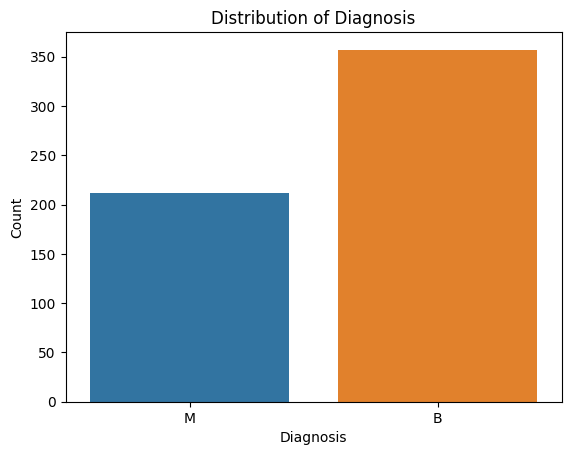

In [6]:
# Now, visualizing the count...
sns.countplot(x='diagnosis', data=df)
plt.xlabel('Diagnosis')
plt.ylabel('Count')
plt.title('Distribution of Diagnosis')
plt.show()

In [7]:
#Look at datatypes(see which columns need to be encoded...)
df.dtypes
#remove id is useless here...
#convert float64-->float and OBJECT--->string

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [8]:
from sklearn.preprocessing import LabelEncoder
labelencoder_Y=LabelEncoder()
df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[: ,1].values)
df.iloc[:,1]#1--M;0--B

<ipython-input-8-1afe488dcedd>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,1]=labelencoder_Y.fit_transform(df.iloc[: ,1].values)


0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

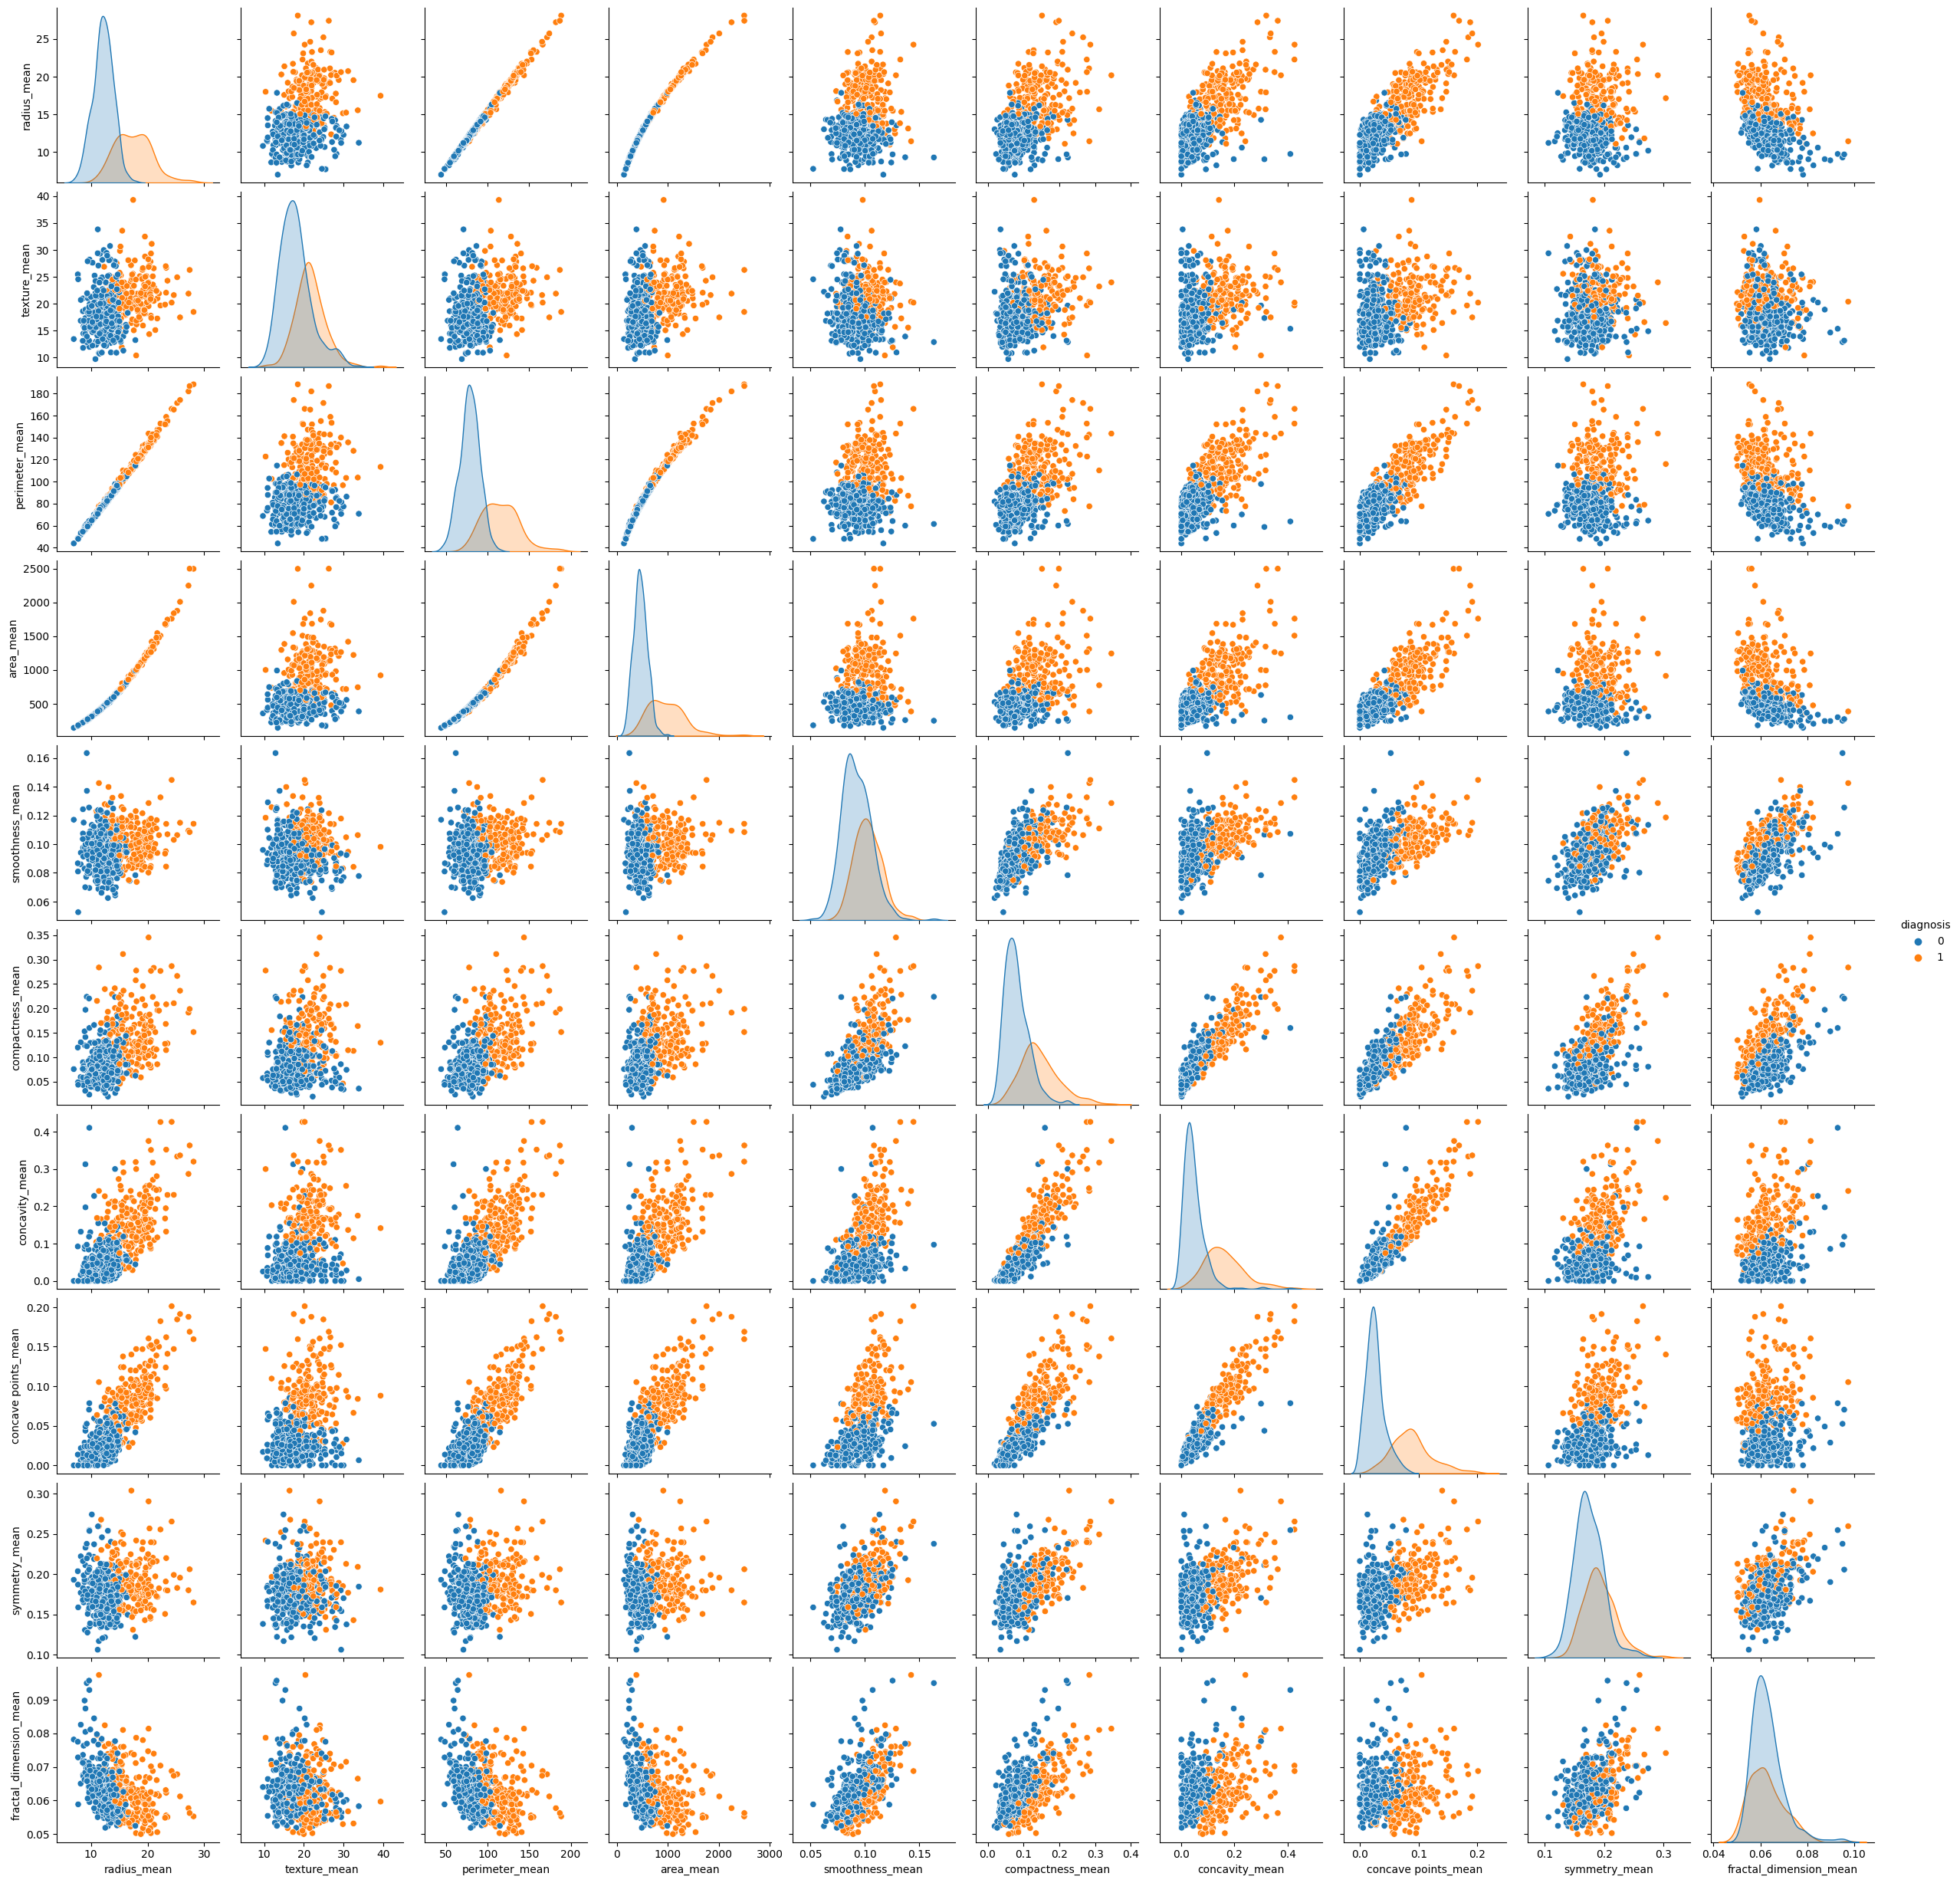

In [ ]:
#create a pairplot..for understanding

sns.pairplot(df.iloc[:,1:12],hue='diagnosis')

In [9]:
#print first 5 rows
df.tail(5)

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
564  926424          1        21.56         22.39          142.00     1479.0   
565  926682          1        20.13         28.25          131.20     1261.0   
566  926954          1        16.60         28.08          108.30      858.1   
567  927241          1        20.60         29.33          140.10     1265.0   
568   92751          0         7.76         24.54           47.92      181.0   

     smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
564          0.11100           0.11590         0.24390              0.13890   
565          0.09780           0.10340         0.14400              0.09791   
566          0.08455           0.10230         0.09251              0.05302   
567          0.11780           0.27700         0.35140              0.15200   
568          0.05263           0.04362         0.00000              0.00000   

     ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
564  ...        25.450          26.40           166.10      2027.0   
565  ...        23.690          38.25           155.00      1731.0   
566  ...        18.980          34.12           126.70      1124.0   
567  ...        25.740          39.42           184.60      1821.0   
568  ...         9.456          30.37            59.16       268.6   

     smoothness_worst  compactness_worst  concavity_worst  \
564           0.14100            0.21130           0.4107   
565           0.11660            0.19220           0.3215   
566           0.11390            0.30940           0.3403   
567           0.16500            0.86810           0.9387   
568           0.08996            0.06444           0.0000   

     concave points_worst  symmetry_worst  fractal_dimension_worst  
564                0.2216          0.2060                  0.07115  
565                0.1628          0.2572                  0.06637  
566                0.1418          0.2218                  0.07820  
567                0.2650          0.4087                  0.12400  
568                0.0000          0.2871                  0.07039  

[5 rows x 32 columns]

In [10]:
#get correlation of columns
df.iloc[:,1:].corr()

diagnosis  radius_mean  texture_mean  perimeter_mean  \
diagnosis                 1.000000     0.730029      0.415185        0.742636   
radius_mean               0.730029     1.000000      0.323782        0.997855   
texture_mean              0.415185     0.323782      1.000000        0.329533   
perimeter_mean            0.742636     0.997855      0.329533        1.000000   
area_mean                 0.708984     0.987357      0.321086        0.986507   
smoothness_mean           0.358560     0.170581     -0.023389        0.207278   
compactness_mean          0.596534     0.506124      0.236702        0.556936   
concavity_mean            0.696360     0.676764      0.302418        0.716136   
concave points_mean       0.776614     0.822529      0.293464        0.850977   
symmetry_mean             0.330499     0.147741      0.071401        0.183027   
fractal_dimension_mean   -0.012838    -0.311631     -0.076437       -0.261477   
radius_se                 0.567134     0.679090      0.275869        0.691765   
texture_se               -0.008303    -0.097317      0.386358       -0.086761   
perimeter_se              0.556141     0.674172      0.281673        0.693135   
area_se                   0.548236     0.735864      0.259845        0.744983   
smoothness_se            -0.067016    -0.222600      0.006614       -0.202694   
compactness_se            0.292999     0.206000      0.191975        0.250744   
concavity_se              0.253730     0.194204      0.143293        0.228082   
concave points_se         0.408042     0.376169      0.163851        0.407217   
symmetry_se              -0.006522    -0.104321      0.009127       -0.081629   
fractal_dimension_se      0.077972    -0.042641      0.054458       -0.005523   
radius_worst              0.776454     0.969539      0.352573        0.969476   
texture_worst             0.456903     0.297008      0.912045        0.303038   
perimeter_worst           0.782914     0.965137      0.358040        0.970387   
area_worst                0.733825     0.941082      0.343546        0.941550   
smoothness_worst          0.421465     0.119616      0.077503        0.150549   
compactness_worst         0.590998     0.413463      0.277830        0.455774   
concavity_worst           0.659610     0.526911      0.301025        0.563879   
concave points_worst      0.793566     0.744214      0.295316        0.771241   
symmetry_worst            0.416294     0.163953      0.105008        0.189115   
fractal_dimension_worst   0.323872     0.007066      0.119205        0.051019   

                         area_mean  smoothness_mean  compactness_mean  \
diagnosis                 0.708984         0.358560          0.596534   
radius_mean               0.987357         0.170581          0.506124   
texture_mean              0.321086        -0.023389          0.236702   
perimeter_mean            0.986507         0.207278          0.556936   
area_mean                 1.000000         0.177028          0.498502   
smoothness_mean           0.177028         1.000000          0.659123   
compactness_mean          0.498502         0.659123          1.000000   
concavity_mean            0.685983         0.521984          0.883121   
concave points_mean       0.823269         0.553695          0.831135   
symmetry_mean             0.151293         0.557775          0.602641   
fractal_dimension_mean   -0.283110         0.584792          0.565369   
radius_se                 0.732562         0.301467          0.497473   
texture_se               -0.066280         0.068406          0.046205   
perimeter_se              0.726628         0.296092          0.548905   
area_se                   0.800086         0.246552          0.455653   
smoothness_se            -0.166777         0.332375          0.135299   
compactness_se            0.212583         0.318943          0.738722   
concavity_se              0.207660         0.248396          0.570517   
concave points_se         0.372320         0.

<Axes: >

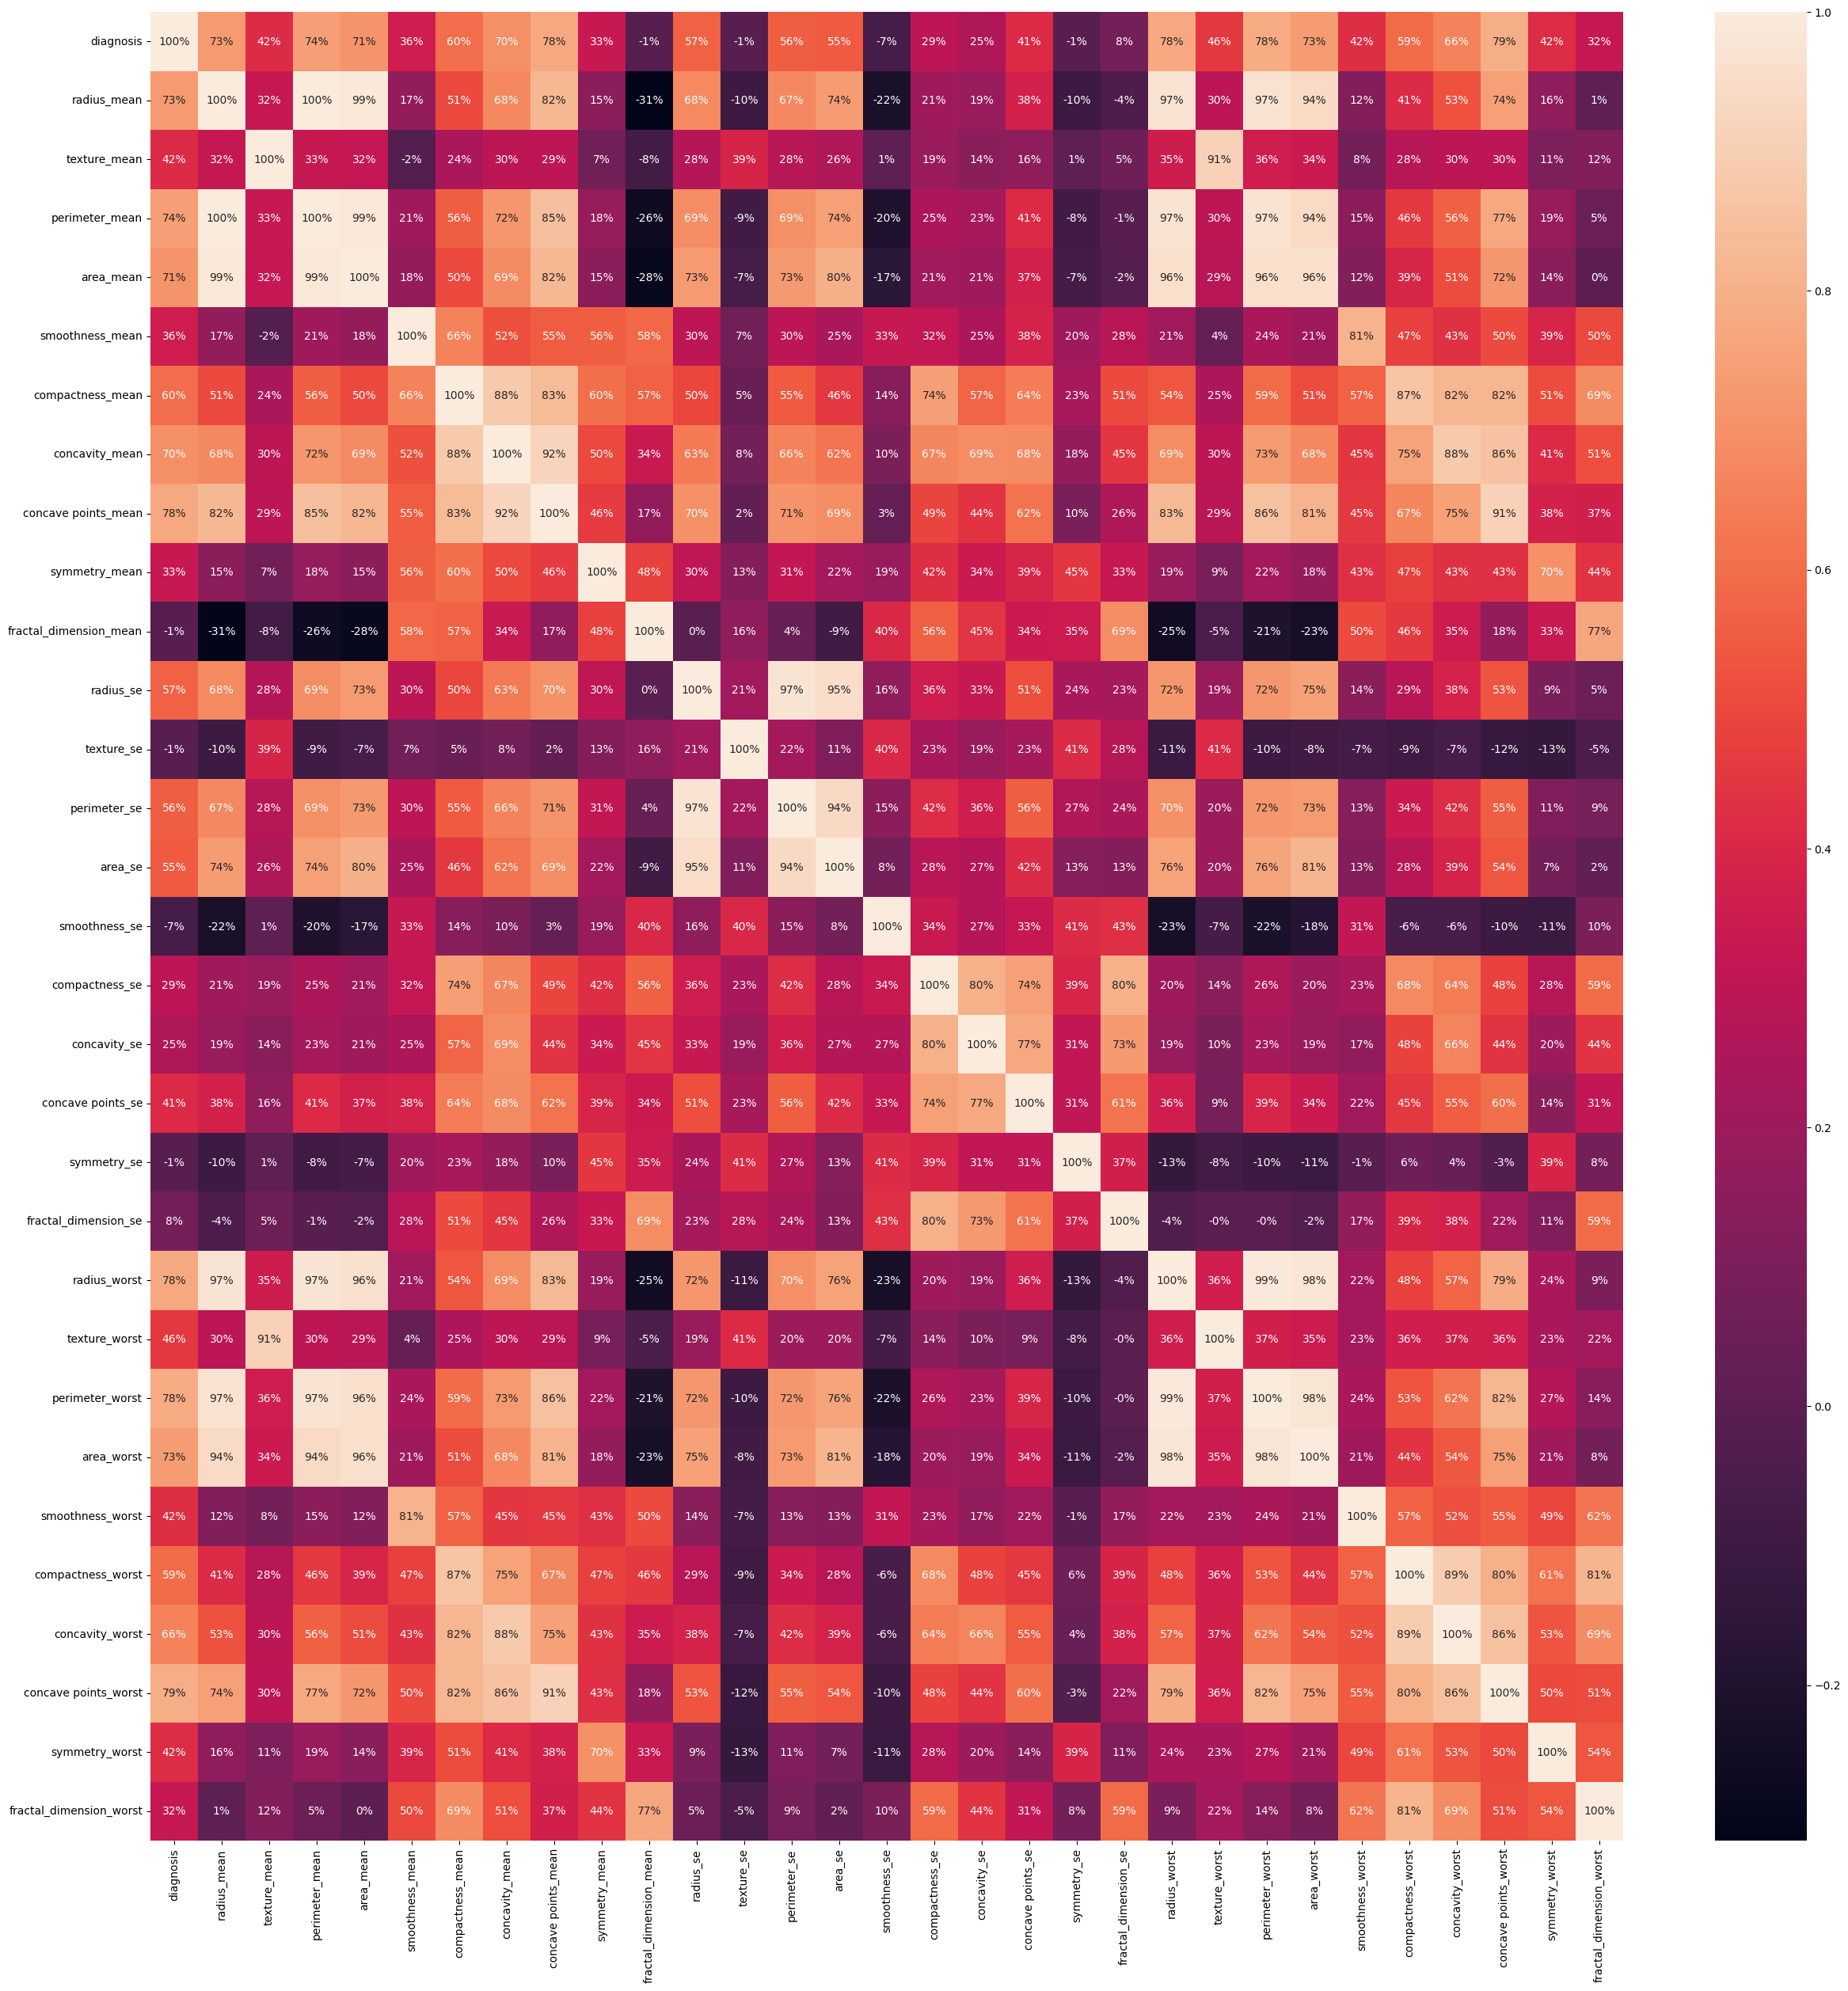

In [11]:
#visualize correlation
plt.figure(figsize=(30,30))
sns.heatmap(df.iloc[:,1:].corr(), annot=True,fmt='.0%')

In [12]:
#creating the detection model
#split dataset into independant(x) and dependant(y) datasets
x=df.iloc[:,2:32].values
y=df.iloc[:,1].values

In [13]:
# split data to 80% training, 20% testing data
from sklearn.model_selection import train_test_split

xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=0)

In [14]:
#scale data to a specific magnitude(feature scaling)
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest= sc.fit_transform(xtest)

xtrain

array([[-1.15036482, -0.39064196, -1.12855021, ..., -0.75798367,
        -0.01614761, -0.38503402],
       [-0.93798972,  0.68051405, -0.94820146, ..., -0.60687023,
         0.09669004, -0.38615797],
       [ 0.574121  , -1.03333557,  0.51394098, ..., -0.02371948,
        -0.20050207, -0.75144254],
       ...,
       [-1.32422924, -0.20048168, -1.31754581, ..., -0.97974953,
        -0.71542314, -0.11978123],
       [-1.24380987, -0.2245526 , -1.28007609, ..., -1.75401433,
        -1.58157125, -1.00601779],
       [-0.73694129,  1.14989702, -0.71226578, ..., -0.27460457,
        -1.25895095,  0.21515662]])

In [15]:
#create 8 models for cancer detection
#create function for the models
def models_in_use(xtrain,ytrain):

  #1...logistic Regression Model
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(xtrain,ytrain)

  #2..decision Tree
  from sklearn.tree import DecisionTreeClassifier
  tree=DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(xtrain,ytrain)

  #3..RandomForestClassifier
  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10, criterion='entropy',random_state=0)
  forest.fit(xtrain,ytrain)

  #4..Multiple Linear Regression
  from sklearn.linear_model import LinearRegression
  linear = LinearRegression()
  linear.fit(xtrain, ytrain)

  #5..Lasso Regression
  from sklearn.linear_model import Lasso
  lasso= Lasso(alpha=1.0)  # alpha  maybe adjusted later as needed
  lasso.fit(xtrain, ytrain)

  #6..Elastic Net Regression
  from sklearn.linear_model import ElasticNet
  elnet = ElasticNet(alpha=1.0, l1_ratio=0.5)  #  maybe adjusted later as needed
  elnet.fit(xtrain, ytrain)

  #7.. Ridge Regression
  from sklearn.linear_model import Ridge
  ridge = Ridge(alpha=1.0)  #  maybe adjusted later as needed
  ridge.fit(xtrain, ytrain)

  #Print accuracy of each model on the training data
  print('[1]Logistic regression:', log.score(xtrain, ytrain))
  print('[2]Decision Tree regression:', tree.score(xtrain, ytrain))
  print('[3]Random Forest regression:', forest.score(xtrain, ytrain))
  print('[4]Multiple Linear regression:', linear.score(xtrain, ytrain))

  print('[5]Lasso regression:', lasso.score(xtrain, ytrain))
  print('[6]ElasticNet regression:', elnet.score(xtrain, ytrain))
  print('[7]Ridge regression:', ridge.score(xtrain, ytrain))

  return log, tree, forest,linear, lasso, elnet, ridge






In [16]:
#fetching all models and printing performances
model= models_in_use(xtrain,ytrain)

[1]Logistic regression: 0.989010989010989
[2]Decision Tree regression: 1.0
[3]Random Forest regression: 0.9978021978021978
[4]Multiple Linear regression: 0.777040360861056
[5]Lasso regression: 0.0
[6]ElasticNet regression: 0.0
[7]Ridge regression: 0.7751934153965975


In [17]:
#from the above scores, it looks like the models that worked the best in tested models is:
#decision tree regression(model 2)

In [18]:
#Now we shall test the model accuracy on testing data on confusion matrix
from sklearn.metrics import classification_report ,accuracy_score

list_for_accuracy=[]
for i in range(0,3):

  topic="Model "+str(i+1)+":  "
  print(topic)
  print( classification_report(ytest,model[0].predict(xtest)))
  print(accuracy_score(ytest,model[0].predict(xtest)))


#for model 4:

threshold = 0.5
predictions = (model[3].predict(xtest) > threshold).astype(int)
topic="Model 4:  "
print(topic)
print(classification_report(ytest,predictions))
print(accuracy_score(ytest, predictions))

#for model 5:

threshold = 0.5
predictions = (model[4].predict(xtest) > threshold).astype(int)
topic="Model 5:  "
print(topic)
print(classification_report(ytest,predictions))
print(accuracy_score(ytest, predictions))

#for model 6:

threshold = 0.5
predictions = (model[5].predict(xtest) > threshold).astype(int)
topic="Model 6:  "
print(topic)
print(classification_report(ytest,predictions))
print(accuracy_score(ytest, predictions))

#for model 7

threshold = 0.5
predictions = (model[6].predict(xtest) > threshold).astype(int)
topic="Model 7:  "
print(topic)
print(classification_report(ytest,predictions))
print(accuracy_score(ytest, predictions))



Model 1:  
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193
Model 2:  
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

0.956140350877193
Model 3:  
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        67
           1       0.96      0.94      0.95        47

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weigh

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

In [19]:
#out of the seven models the following give the highest accuracy of 95.614% on training data.
#Logistic regression
#Decision Tree regression
#Random Forest regression
#For this case, we choose Decision Tree Classifier(model 2) since this is the model that has outperformed the others in both training and testing datasets.
#printing prediction for decision tree model
pred=model[1].predict(xtest)
print(pred)
print()
print(ytest)

[1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 0 0
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0
 1 1 0]

[1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1
 1 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 1 0
 1 1 0]


In [20]:
df.head(5)

id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302          1        17.99         10.38          122.80     1001.0   
1    842517          1        20.57         17.77          132.90     1326.0   
2  84300903          1        19.69         21.25          130.00     1203.0   
3  84348301          1        11.42         20.38           77.58      386.1   
4  84358402          1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

In [21]:
#Predicting diagnosis based on data entered by User:
#the input data is entered by the user. The code remains the same for both cases.
#Case 1: BENIGN
input_data = {
    'radius_mean': 13.03,
    'texture_mean': 18.42,
    'perimeter_mean': 82.61,
    'area_mean': 523.8,
    'smoothness_mean': 0.08983,
    'compactness_mean': 0.03766,
    'concavity_mean': 0.02562,
    'concave_points_mean': 0.02923,
    'symmetry_mean': 0.1467,
    'fractal_dimension_mean': 0.05863,
    'radius_se': 0.1839,
    'texture_se': 2.342,
    'perimeter_se': 1.17,
    'area_se': 14.16,
    'smoothness_se': 0.004352,
    'compactness_se': 0.004899,
    'concavity_se': 0.01343,
    'concave_points_se': 0.01164,
    'symmetry_se': 0.02671,
    'fractal_dimension_se': 0.001777,
    'radius_worst': 13.3,
    'texture_worst': 22.81,
    'perimeter_worst': 84.46,
    'area_worst': 545.9,
    'smoothness_worst': 0.09701,
    'compactness_worst': 0.04619,
    'concavity_worst': 0.04833,
    'concave_points_worst': 0.05013,
    'symmetry_worst': 0.1987,
    'fractal_dimension_worst': 0.06169
}

# Create a DataFrame with the input data
input_df = pd.DataFrame([input_data])
# Standardize the input data using the same scaler used for training
input_df_scaled = sc.transform(input_df)
# Create a DataFrame with the standardized input data
input_df_scaled = pd.DataFrame(input_df_scaled, columns=input_df.columns)

# Predict diagnosis using each model
prediction = model[1].predict(input_df_scaled)
if prediction[0] == 1:
   print(f'Model 2: Predicted diagnosis is MALIGNANT')
else:
    print(f'Model 2: Predicted diagnosis is BENIGN')


Model 2: Predicted diagnosis is BENIGN


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [22]:
#Case 2: Malignant


input_data = {
    'radius_mean': 17.42,
    'texture_mean': 10.38,
    'perimeter_mean': 122.58,
    'area_mean': 1001.1,
    'smoothness_mean': 0.1425,
    'compactness_mean': 0.2739,
    'concavity_mean': 0.3014,
    'concave_points_mean': 0.1452,
    'symmetry_mean': 0.2597,
    'fractal_dimension_mean': 0.09744,
    'radius_se': 0.4956,
    'texture_se': 1.156,
    'perimeter_se': 3.445,
    'area_se': 27.23,
    'smoothness_se': 0.00911,
    'compactness_se': 0.07458,
    'concavity_se': 0.05661,
    'concave_points_se': 0.01867,
    'symmetry_se': 0.05963,
    'fractal_dimension_se': 0.009208,
    'radius_worst': 24.91,
    'texture_worst': 18.5,
    'perimeter_worst': 188.87,
    'area_worst': 2019.7,
    'smoothness_worst': 0.1698,
    'compactness_worst': 0.8663,
    'concavity_worst': 0.7169,
    'concave_points_worst': 0.2575,
    'symmetry_worst': 0.4638,
    'fractal_dimension_worst': 0.1173
}

# Create a DataFrame with the input data
input_df = pd.DataFrame([input_data])
# Standardize the input data using the same scaler used for training
input_df_scaled = sc.transform(input_df)
# Create a DataFrame with the standardized input data
input_df_scaled = pd.DataFrame(input_df_scaled, columns=input_df.columns)

# Predict diagnosis using each model
prediction = model[1].predict(input_df_scaled)
if prediction[0] == 1:
   print(f'Model 2: Predicted diagnosis is MALIGNANT')
else:
    print(f'Model 2: Predicted diagnosis is BENIGN')


Model 2: Predicted diagnosis is MALIGNANT


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(
